# 01. HTML table과, tag name 쓱싹 이해하기-!

**Selenium을 이용해 테이블 내의 데이터를 읽으려고 한다.**

**그러기 위해서는 먼저 HTML에서 테이블을 구성하는 방법에 대해 알아야 한다.**

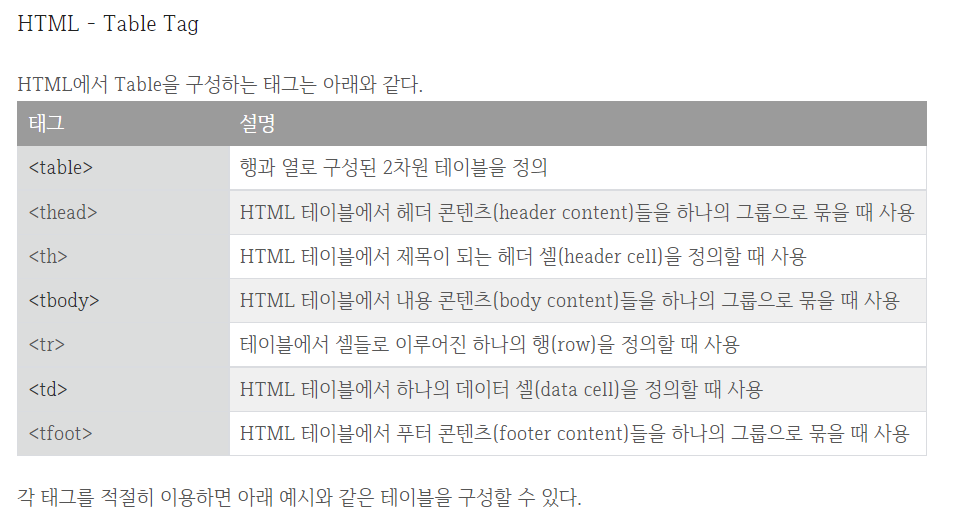

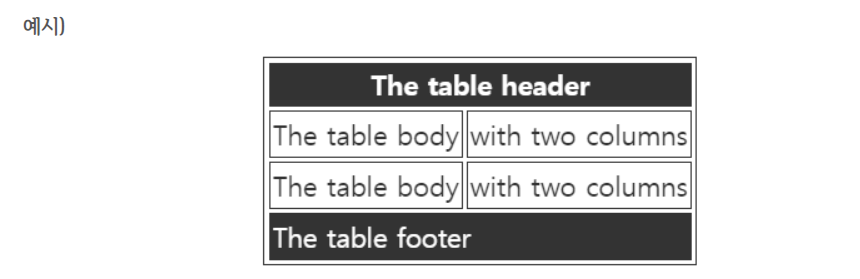

### 더블클릭해 코드 확인


<table>
    <thead>
        <tr>
            <th>The table header<th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>The table body</td>
            <td>The table body</td>
        </tr>
        <tr>
            <td>The table body</td>
            <td>The table body</td>
        </tr>
    </tbody>
  <tfoot>
        <tr>
            <td>The table footer</td>
        </tr>
    </tfoot>
</table>

**즉, table은 thead, tbody, tfoot 영역으로 구성될 수 있다. 각 영역은 여러 열(tr)로, 하나의 열(tr)은 여러 칸(td)으로 구성되어 있다.**

# 02. 오뚜기 크롤링코드도 뚝딱 써보자-!

In [1]:
import time
import numpy as np
import pandas as pd

In [2]:
# Selenium import
from selenium import webdriver
from selenium.webdriver.common.by import By

# webdriver 설정하기
driver = webdriver.Chrome('chromedriver.exe')

C:\Users\bangm\AppData\Local\Temp/ipykernel_50072/1264408980.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [3]:
# 오뚜기 제품 소개 페이지(짜슐랭)으로 접속
url = "https://ottogi.co.kr/product/product_view.asp?page=1&hcode=&mcode=&stxt=&orderby=BEST&idx=2382" 
driver.get(url)

<table class="bordered vtbl nutrientTbl">
							<caption>영양성분</caption>
							<colgroup>
								<col>
								<col style="width:9%;">
								<col style="width:9%;">
								<col style="width:9%;">
								<col style="width:9%;">
								<col style="width:9%;">
								<col style="width:9%;">
								<col style="width:9%;">
								<col style="width:9%;">
								<col style="width:9%;">
							</colgroup>
							<tbody>
								<tr class="first">
									<th scope="row">영양성분표</th>
									<th class="th2" scope="col"><strong>열량 </strong></th>
									<th class="th2" scope="col"><strong>나트륨 </strong></th>
									<th class="th2" scope="col"><strong>탄수화물 </strong></th>
									<th class="th2" scope="col"><strong>당류 </strong></th>
									<th class="th2" scope="col"><strong>지방 </strong></th>
									<th class="th2" scope="col"><strong>트랜스지방 </strong></th>
									<th class="th2" scope="col"><strong>포화지방 </strong></th>
									<th class="th2" scope="col"><strong>콜레스테롤 </strong></th>
									<th class="th2" scope="col"><strong>단백질 </strong></th>																								
								</tr>
								<tr>
									<th scope="row"></th>
									<td>600kcal</td>
									<td>1100mg</td>
									<td>100g</td>
									<td>6g</td>
									<td>18g</td>
									<td>0g</td>
									<td>8g</td>
									<td>0mg</td>
									<td>12g</td>
								</tr>
								<tr>
									<th scope="row">영양성분 기준치(%)</th>
									<td></td>
									<td>55%</td>
									<td>31%</td>
									<td>6%</td>
									<td>33%</td>
									<td>0%</td>
									<td>53%</td>
									<td>0%</td>									
									<td>22%</td>
								</tr>
							</tbody>
						</table>

In [4]:
# table element 접근. 찾는 속성은 적절하게 고려한다.
table = driver.find_element(By.XPATH, "//*[@id=\"ottugiWrap\"]/div[2]/div/div[3]/table")

# table 내부 어떤 텍스트들이 있는지 출력해보자.
table.text

'영양성분표 열량 나트륨 탄수화물 당류 지방 트랜스지방 포화지방 콜레스테롤\n600kcal 1100mg 100g 6g 18g 0g 8g 0mg\n영양성분 기준치(%) 55% 31% 6% 33% 0% 53% 0%'

In [5]:
# tr - 테이블에서 셀들로 이루어진 하나의 행(row)를 정의
thead_tr = table.find_elements(By.TAG_NAME, "tr")

# tr태그 텍스트들이 있는지 출력해보자. 문제가 무엇인가??
for tr in range(len(thead_tr)):
    print(thead_tr[tr].text)

영양성분표 열량 나트륨 탄수화물 당류 지방 트랜스지방 포화지방 콜레스테롤
600kcal 1100mg 100g 6g 18g 0g 8g 0mg
영양성분 기준치(%) 55% 31% 6% 33% 0% 53% 0%


In [6]:
# tr & th
# tr - 테이블에서 셀들로 이루어진 하나의 행(row)를 정의할 때 사용
# th - HTML 테이블에서 제목이 되는 헤더 셀(header cell)
thead_tr = table.find_elements(By.TAG_NAME, "tr")

# tr - 테이블에서 셀들로 이루어진 하나의 행(row)를 정의할 때 사용
# th - HTML 테이블에서 제목이 되는 헤더 셀(header cell)
# th태그 텍스트들이 있는지 출력해보자. 문제가 무엇인가??
for tr in thead_tr:
    thead_th = tr.find_elements(By.TAG_NAME, "th")
    for th in thead_th:
        print(th.text)

영양성분표
열량
나트륨
탄수화물
당류
지방
트랜스지방
포화지방
콜레스테롤


영양성분 기준치(%)


In [7]:
# tbody
# tbody - HTML테이블에서 내용 콘텐츠(body content)들을 하나의 그룹으로 묶을 때 사용
tbody = table.find_element(By.TAG_NAME, "tbody")

# tr - 테이블에서 셀들로 이루어진 하나의 행(row)를 정의할 때 사용
# td - HTML 테이블에서 하나의 데이터 셀(data cell)을 정의할 때 사용
# td태그 텍스트들이 있는지 출력해보자. 문제가 무엇인가??
for tr in tbody.find_elements(By.TAG_NAME, "tr"):
    for td in tr.find_elements(By.TAG_NAME, "td"):
        print(td.get_attribute("innerText"))

600kcal
1100mg
100g
6g
18g
0g
8g
0mg
12g

55%
31%
6%
33%
0%
53%
0%
22%


# 03. for문 쌓아서 몇개 크롤링 해보자-!

In [8]:
# for문을 쌓아 2차원 배열로 만들어버리기....

elems = []
for i in range(10):
    # url 인덱스 +1씩 해서 오뚜기 제품 소개 페이지 접속
    time.sleep(1)
    url = "https://ottogi.co.kr/product/product_view.asp?page=1&hcode=&mcode=&stxt=&orderby=BEST&idx="+str(2382+i)
    driver.get(url)
    
    name = driver.find_element(By.XPATH, "//*[@id=\"ottugiWrap\"]/div[2]/div/div[1]/h2")
    table = driver.find_element(By.XPATH, "//*[@id=\"ottugiWrap\"]/div[2]/div/div[3]/table")
    # tbody
    # tbody - HTML테이블에서 내용 콘텐츠(body content)들을 하나의 그룹으로 묶을 때 사용
    tbody = table.find_element(By.TAG_NAME, "tbody")

    # tr - 테이블에서 셀들로 이루어진 하나의 행(row)를 정의할 때 사용
    # td - HTML 테이블에서 하나의 데이터 셀(data cell)을 정의할 때 사용
    # td태그 텍스트들이 있는지 출력해보자. 문제가 무엇인가??
    
    row = []
    row. append(name.text)
    for tr in tbody.find_elements(By.TAG_NAME, "tr"):
        for td in tr.find_elements(By.TAG_NAME, "td"):
            row.append(td.get_attribute("innerText"))
    
    elems.append(row)

In [9]:
nutri_df = pd.DataFrame(elems)
nutri_df.columns = ['이름', '열량', '나트륨', '탄수화물', '당류', '지방', '트랜스지방', '포화지방', '콜레스테롤', '단백질', '', '영양성분 기준치(%)-나트륨', '영양성분 기준치(%)-탄수화물', '영양성분 기준치(%)-당류', '영양성분 기준치(%)-지방', '영양성분 기준치(%)-트랜스', '영양성분 기준치(%)-포화', '영양성분 기준치(%)-콜레스테롤', '영양성분 기준치(%)-단백질']
nutri_df.head(5)

,이름,열량,나트륨,탄수화물,당류,지방,트랜스지방,포화지방,콜레스테롤,단백질,,영양성분 기준치(%)-나트륨,영양성분 기준치(%)-탄수화물,영양성분 기준치(%)-당류,영양성분 기준치(%)-지방,영양성분 기준치(%)-트랜스,영양성분 기준치(%)-포화,영양성분 기준치(%)-콜레스테롤,영양성분 기준치(%)-단백질
0,짜슐랭,600kcal,1100mg,100g,6g,18g,0g,8g,0mg,12g,,55%,31%,6%,33%,0%,53%,0%,22%
1,가벼운참치 라이트스탠다드,145kcal,250mg,1g,0g,7g,0g,1.6g,25mg,19g,,13%,0%,0%,13%,%,11%,8%,35%
2,가벼운참치 더마일드,120kcal,370mg,3g,0g,3.6g,0g,0.9g,30mg,19g,,19%,1%,0%,7%,0%,6%,10%,35%
3,가벼운참치 김치찌개용,135kcal,670mg,5g,2g,3.7g,0g,0.9g,25mg,20g,,34%,2%,2%,3.7%,0%,0.9%,8%,36%
4,가벼운참치 고추,100kcal,580mg,11g,5g,1.6g,0g,0.5g,20mg,20g,,29%,3%,5%,3%,%,0.5%,7%,20%


# 04. try, except, finally - for문 쌓아서 전체 크롤링 해보자-!

In [5]:
# for문을 쌓아 2차원 배열로 만들어버리기....

elems = []
errors = []
for i in range(2800):
    try:
        # url 인덱스 +1씩 해서 오뚜기 제품 소개 페이지 접속
        time.sleep(0.02)
        url = "https://ottogi.co.kr/product/product_view.asp?page=1&hcode=&mcode=&stxt=&orderby=BEST&idx="+str(i)
        driver.get(url)

        name = driver.find_element(By.XPATH, "//*[@id=\"ottugiWrap\"]/div[2]/div/div[1]/h2")
        table = driver.find_element(By.XPATH, "//*[@id=\"ottugiWrap\"]/div[2]/div/div[3]/table")
        # tbody
        # tbody - HTML테이블에서 내용 콘텐츠(body content)들을 하나의 그룹으로 묶을 때 사용
        tbody = table.find_element(By.TAG_NAME, "tbody")

        # tr - 테이블에서 셀들로 이루어진 하나의 행(row)를 정의할 때 사용
        # td - HTML 테이블에서 하나의 데이터 셀(data cell)을 정의할 때 사용
        # td태그 텍스트들이 있는지 출력해보자. 문제가 무엇인가??

        elem = []
        elem. append(name.text)
        elem. append(str(i))
        for tr in tbody.find_elements(By.TAG_NAME, "tr"):
            for td in tr.find_elements(By.TAG_NAME, "td"):
                elem.append(td.get_attribute("innerText"))

        elems.append(elem)
    except:
        errors.append(str(i))
    #finally:
        

In [6]:
nutri_df = pd.DataFrame(elems)
nutri_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,과일과 야채 케챂,3,130kcal,1000mg,30g,29g,0g,0g,0g,0mg,2g,,50%,9%,29%,0%,%,0%,0%,4%
1,참깨돈까스소스,7,125kcal,1150mg,29g,25g,0.6g,-g,0g,0mg,1g,,58%,9%,25%,1%,%,0%,0%,2%
2,육개장 소형,13,130kcal,"1,580mg",31g,1g,g,g,0g,0mg,1g,,13%,%,%,%,%,%,%,%
3,컵누들 우동맛,17,120kcal,890mg,27g,3g,0.5g,0g,0g,0mg,2g,,45%,8%,3%,1%,%,0%,0%,4%
4,컵누들 김치맛,18,120kcal,"1,080mg",29g,2g,0g,0g,0g,0mg,1g,,54%,9%,%,0%,%,0%,0%,2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,두수고방 된장보리죽 250G,2439,140kcal,420mg,28g,1g,1.1g,0g,0g,0mg,4g,,21%,9%,1%,2%,0%,0%,0%,7%
1893,두수고방 들깨버섯죽 250G,2440,190kcal,300mg,23g,0g,8g,0g,0.7g,0mg,6g,,15%,7%,0%,15%,%,5%,0%,11%
1894,두수고방 흑임자죽 250G,2441,165kcal,450mg,22g,2g,7g,0g,1.2g,0mg,4g,,23%,7%,2%,13%,%,8%,0%,7%
1895,두수고방 수수팥범벅 250G,2442,260kcal,400mg,54g,4g,0.7g,0g,0g,0mg,9g,,20%,17%,4%,1%,%,0%,0%,16%


In [7]:
nutri_df.columns = ['이름','index', '열량', '나트륨', '탄수화물', '당류', '지방', '트랜스지방', '포화지방', '콜레스테롤', '단백질', '', '영양성분 기준치(%)-나트륨', '영양성분 기준치(%)-탄수화물', '영양성분 기준치(%)-당류', '영양성분 기준치(%)-지방', '영양성분 기준치(%)-트랜스', '영양성분 기준치(%)-포화', '영양성분 기준치(%)-콜레스테롤', '영양성분 기준치(%)-단백질']
nutri_df.drop(columns='', inplace = True)
nutri_df

,이름,index,열량,나트륨,탄수화물,당류,지방,트랜스지방,포화지방,콜레스테롤,단백질,영양성분 기준치(%)-나트륨,영양성분 기준치(%)-탄수화물,영양성분 기준치(%)-당류,영양성분 기준치(%)-지방,영양성분 기준치(%)-트랜스,영양성분 기준치(%)-포화,영양성분 기준치(%)-콜레스테롤,영양성분 기준치(%)-단백질
0,과일과 야채 케챂,3,130kcal,1000mg,30g,29g,0g,0g,0g,0mg,2g,50%,9%,29%,0%,%,0%,0%,4%
1,참깨돈까스소스,7,125kcal,1150mg,29g,25g,0.6g,-g,0g,0mg,1g,58%,9%,25%,1%,%,0%,0%,2%
2,육개장 소형,13,130kcal,"1,580mg",31g,1g,g,g,0g,0mg,1g,13%,%,%,%,%,%,%,%
3,컵누들 우동맛,17,120kcal,890mg,27g,3g,0.5g,0g,0g,0mg,2g,45%,8%,3%,1%,%,0%,0%,4%
4,컵누들 김치맛,18,120kcal,"1,080mg",29g,2g,0g,0g,0g,0mg,1g,54%,9%,%,0%,%,0%,0%,2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,두수고방 된장보리죽 250G,2439,140kcal,420mg,28g,1g,1.1g,0g,0g,0mg,4g,21%,9%,1%,2%,0%,0%,0%,7%
1893,두수고방 들깨버섯죽 250G,2440,190kcal,300mg,23g,0g,8g,0g,0.7g,0mg,6g,15%,7%,0%,15%,%,5%,0%,11%
1894,두수고방 흑임자죽 250G,2441,165kcal,450mg,22g,2g,7g,0g,1.2g,0mg,4g,23%,7%,2%,13%,%,8%,0%,7%
1895,두수고방 수수팥범벅 250G,2442,260kcal,400mg,54g,4g,0.7g,0g,0g,0mg,9g,20%,17%,4%,1%,%,0%,0%,16%


In [8]:
error_df = pd.DataFrame(errors)
error_df.columns = ['index']
error_df

,index
0,0
1,1
2,2
3,4
4,5
...,...
898,2795
899,2796
900,2797
901,2798


In [9]:
nutri_df.to_excel("nutri_df.xlsx")
error_df.to_excel("error_df.xlsx")